CLASSES AND OBJECTS IN PYTHON:
    https://docs.python.org/3/tutorial/classes.html

COMPLETE PYTHON DOCUMENTATION:
    https://docs.python.org/3/tutorial/index.html

It is not compulsory to organise your code into classes when you program in Python. You can use functions by themselves, in what is called a procedural programming approach. However, while a procedural style can suffice for writing short, simple programs, an object-oriented programming (OOP) approach becomes more valuable the more your program grows in size and complexity.

The main additional advantage of object orientation is that it combines data with the functions which act upon that data in a single structure. This makes it easy for us to find related parts of our code, since they are physically defined in close proximity to one another. 

The most important principle of object orientation is encapsulation: the idea that data inside the object should only be accessed through a public interface – that is, the object’s methods.

In Python, there are two main types of relationships between classes: composition and inheritance.
Inheritance is a way of arranging objects in a hierarchy from the most general to the most specific. An object which inherits from another object is considered to be a subtype of that object.

In [2]:
import datetime
class Person:

    def __init__(self, first_name, last_name, dob, address, telephone, email):
        self.first_name = first_name
        self.last_name = last_name
        self.dob = dob

        self.address = address
        self.telephone = telephone
        self.email = email

    def age(self):
        today = datetime.date.today()
        age = today.year - self.dob.year

        if today < datetime.date(today.year, self.dob.month, self.dob.day):
            age -= 1

        return age

person1 = Person(
    "himanshu",
    "aggarwal",
    datetime.date(1992, 3, 26), # year, month, day
    "ABC, MIAMI",
    "480 395 8900",
    "himanshu.aggarwal@ironhack.com"
)

print(person1.first_name)
print(person1.last_name)
print(person1.email)
print(person1.age())

himanshu
aggarwal
himanshu.aggarwal@ironhack.com
27


We can also list any parent classes in between round brackets before the colon while
defining the class <Person>. This would mean that this class can inherit 
properties/attributes and methods defined in the parent class

__init__  is a special function that is called first when an instance of the class is 
created. age() is a custom method defined. 


CONSTRUCTOR 

__init__ is sometimes called the object’s constructor, because it is used similarly to the way that constructors are used in other languages like C++. 
A constructor is a member function of a class which initializes objects of a class. In C++, Constructor is automatically called when object(instance of class) create. It is special member function of the class.A constructor is different from normal functions in following ways:

Constructor has same name as the class itself
Constructors don’t have return type
A constructor is automatically called when an object is created.
If we do not specify a constructor, C++ compiler generates a default constructor


BACK TO THE ABOVE EXAMPLE

Both of these method definitions have self as the first parameter, and we use this variable inside the method bodies – but we don’t appear to pass this parameter in. This is because whenever we call a method on an object, the object itself is automatically passed in as the first parameter. This gives us a way to access the object’s properties from inside the object’s methods.

All the attributes which are defined on a Person instance are instance attributes – they are added to the instance when the __init__ method is executed. We can, however, also define attributes which are set on the class. These attributes will be shared by all instances of that class. 

FUNCTION OVERLOADING

Any class that you define has object as its parent class even if you don’t explicitly say so – so your class will have a lot of default attributes and methods that any Python object has. This is why you can just leave out the __init__ method out of your class if you don’t have any initialisation to do – the default that you inherited from object (which does nothing) will be used instead. If you do write your own __init__ method, it will override the default method. Sometimes we also call this overloading. The same goes for other special functions such as _str_ etc. These are also somtimes called magic methods

Here are some examples of special object properties:

__init__: the initialisation method of an object, which is called when the object is created.
__str__: the string representation method of an object, which is called when you use the str function to convert that object to a string.
__class__: an attribute which stores the the class (or type) of an object – this is what is returned when you use the type function on the object.
__eq__: a method which determines whether this object is equal to another. There are also other methods for determining if it’s not equal, less than, etc.. These methods are used in object comparisons, for example when we use the equality operator == to check if two objects are equal.
__add__ is a method which allows this object to be added to another object. There are equivalent methods for all the other arithmetic operators. Not all objects support all arithemtic operations – numbers have all of these methods defined, but other objects may only have a subset.
__iter__: a method which returns an iterator over the object – we will find it on strings, lists and other iterables. It is executed when we use the iter function on the object.
__len__: a method which calculates the length of an object – we will find it on sequences. It is executed when we use the len function of an object.
__dict__: a dictionary which contains all the instance attributes of an object, with their names as keys. It can be useful if we want to iterate over all the attributes of an object. __dict__ does not include any methods, class attributes or special default attributes like __class__

CLASS INHERITENCE

In [58]:
class Parent:        # define parent class
   parentAttr = 100
   def __init__(self):
      print("Calling parent constructor")

   def parentMethod(self):
      print('Calling parent method') 

   def setAttr(self, attr):
      Parent.parentAttr = attr

   def getAttr(self):
      print("Parent attribute :", Parent.parentAttr)

class Child(Parent): # define child class
   def __init__(self):
      print("Calling child constructor")

   def childMethod(self):
      print('Calling child method')

c = Child()          # instance of child
c.childMethod()      # child calls its method
c.parentMethod()     # calls parent's method
c.setAttr(200)       # again call parent's method
c.getAttr()          # again call parent's method

Calling child constructor
Calling child method
Calling parent method
Parent attribute : 200


In [21]:
import pandas as pd

     X          Y
0  1.0   1.749211
1  2.0   4.406532
2  3.0   2.541638
3  4.0  10.629049
4  5.0   7.107495


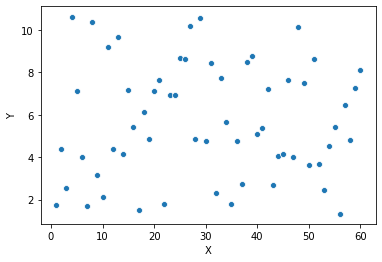

In [22]:
import numpy as np
import seaborn as sns
X = np.linspace(1,60,60)
# y = np.random.randint(low=1,high=10,size=60)
# y = 1+ 10*np.random.normal(size=60)
y = 1+ 10*np.random.uniform(size=60)
data = pd.DataFrame(columns=['X','Y'])
data['X'] = X
data['Y'] = y
print(data.head(5))
sns.scatterplot(x='X', y='Y', data=data)

In [40]:
class LinearReg:

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coefficients = None
        self.intercept = None
        
    def fit(self, X, y):
        # This function returns the fitted linear model 
        # input: X - predictor variables and y - response variables
        # output: regression coefficients
        
        xtx = np.dot(X.T, X) ## x-transpose times x
        xtx_inv = np.linalg.inv(xtx) ## inverse of x-transpose times x
        xty = np.dot(X.T, y) ## x-transpose times y
        coefficients = np.dot(xtx_inv, xty)
        
        if self.fit_intercept:
            self.intercept = coefficients[0]
            self.coefficients = coefficients[1:]
        else:
            self.intercept = 0
            self.coefficients = coefficients
            
            
    def predict(self, X):
        # This function returns the predicted values
        # input: array of dependent variables
        # output: predicted values
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 
            return self.intercept_ + np.dot(X, self.coef_) 

In [42]:
X = np.random.randn(100)
y = np.random.randn(100)

In [45]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [46]:
linreg = LinearReg()
linreg.fit(X, y)

In [48]:
print(linreg.predict(X))

None


In [52]:
len(X.shape)

2